##### ------------------------------------------
##### --- Desenvolvedor: Alysson Morandi --- Data: 29/01/2022 --- Python Version: 3.8
##### --- Objetivo: Geração de gráfico de exemplo com dados armazenados no database mqtt.db
##### ------------------------------------------

In [3]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)


In [4]:
conn = sql.connect('mqtt.db')
df = pd.read_sql('SELECT * FROM sensors_data', conn)
print(df.head())
conn.close()

   id     SensorID Location             DateTime Temperatura Umidade
0   1      sensor2   quarto  29/01/2022 20:17:34          31      75
1   2      sensor2   quarto  29/01/2022 20:19:33          31      75
2   3  sensor_sala     sala  29/01/2022 20:19:44          24      75
3   4      sensor2   quarto  29/01/2022 20:21:51          31      75
4   5      sensor2   quarto  29/01/2022 20:22:18        31.6   75.45


In [5]:
# info básicas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           41 non-null     int64 
 1   SensorID     41 non-null     object
 2   Location     41 non-null     object
 3   DateTime     41 non-null     object
 4   Temperatura  41 non-null     object
 5   Umidade      41 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


In [6]:
# conversao de tipos object
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['SensorID'] = df['SensorID'].astype('string')
df['Location'] = df['Location'].astype('string')
df['Temperatura'] = df['Temperatura'].astype('float')
df['Umidade'] = df['Umidade'].astype('float')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           41 non-null     int64         
 1   SensorID     41 non-null     string        
 2   Location     41 non-null     string        
 3   DateTime     41 non-null     datetime64[ns]
 4   Temperatura  41 non-null     float64       
 5   Umidade      41 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), string(2)
memory usage: 2.0 KB


In [8]:
# agrupamento de valores máximos por location
df_location = df.groupby('Location', as_index=False).max()
df_location.head()

,Location,id,SensorID,DateTime,Temperatura,Umidade
0,escritorio,39,sensor3,2022-01-29 20:37:03,37.65,34.07
1,quarto,41,sensor2,2022-01-29 20:37:11,31.60,79.45
2,sala,40,sensor_sala,2022-01-29 20:37:04,32.15,75.00


Text(0.5, 1.0, 'Temperatura / Umidade máxima por local')

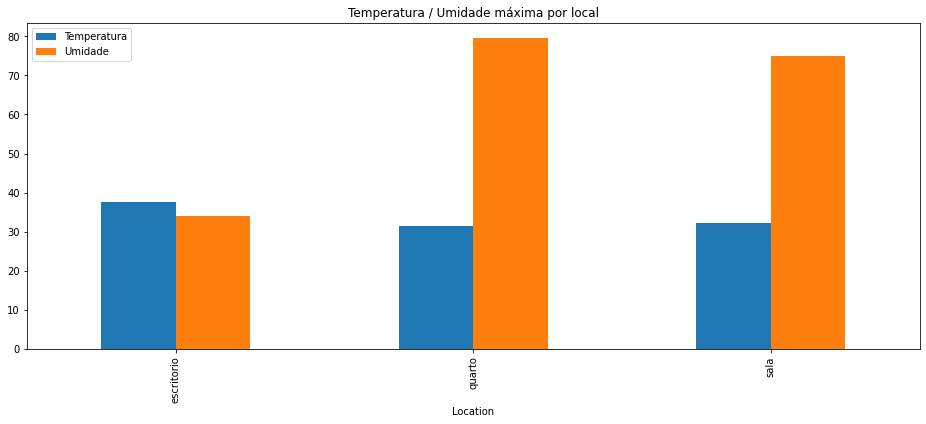

In [9]:
# plot do gráfico de barras de temperatura e umidade maxima por local
df_location.plot.bar(x='Location', y=['Temperatura','Umidade'])
plt.title('Temperatura / Umidade máxima por local')

In [11]:
# agrupamento de valores médios por location
df_location_mean = df.groupby('Location', as_index=False).mean()
df_location_mean.head()

,Location,id,Temperatura,Umidade
0,escritorio,24.000000,24.829091,26.888182
1,quarto,17.722222,25.478889,62.476667
2,sala,23.166667,26.466667,42.343333


Text(0.5, 1.0, 'Temperatura / Umidade média por local')

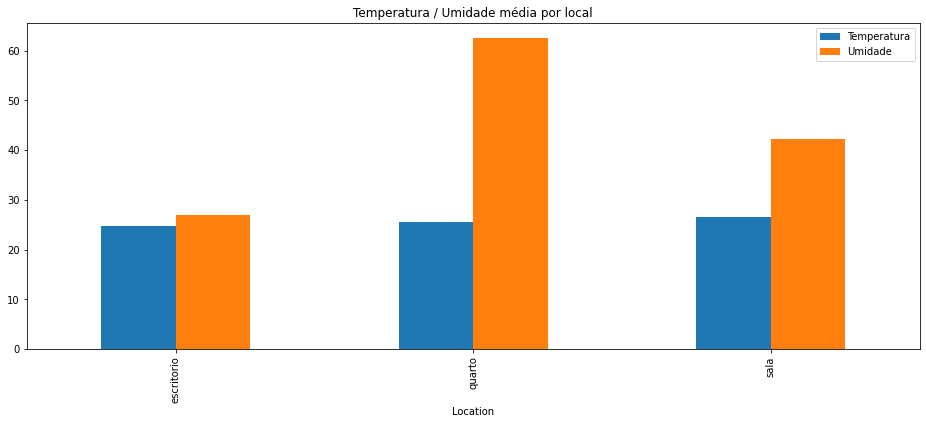

In [12]:
# plot do gráfico de barras de temperatura e umidade média por local
df_location_mean.plot.bar(x='Location', y=['Temperatura','Umidade'])
plt.title('Temperatura / Umidade média por local')